In [1]:
import os
os.chdir('..')

In [2]:
import h5py
import ast
import numpy as np
import torch
import matplotlib.pyplot as plt

from modules.h5_lazy_dataset import H5LazyDataset

In [3]:
FS: float = 100_000_000

In [ ]:
h5_lazy_dataset = H5LazyDataset(
    'data/train/train.h5', 'waveforms', 'labels',
    data_transforms=(
        torch.tensor,
    ),
    label_transforms=(
        lambda _bytes: _bytes.decode('utf-8'),
        ast.literal_eval,
        torch.tensor,
    ),
)

Loading dataset from data/train/train.h5...


In [5]:
print(type(h5_lazy_dataset))

<class 'modules.h5_lazy_dataset.H5LazyDataset'>


In [6]:
waveform: torch.Tensor
label: torch.Tensor
waveform, label = h5_lazy_dataset[0]

ValueError: malformed node or string: np.bytes_(b'[[2427.0, 2447.0], [2422.0, 2432.0], [2422.0, 2432.0], [2427.0, 2447.0]]')

In [ ]:
print(waveform, label)

[ 3633.75   +1094.75j    1841.57   -2087.903j   -978.80225-1032.3933j ...
  3684.816  +1735.1885j  2502.5044 -1987.3585j -1170.4862 -1967.5258j] b'[[2427.0, 2447.0], [2422.0, 2432.0], [2422.0, 2432.0], [2427.0, 2447.0]]'


In [ ]:
fft_waveform: np.ndarray = np.fft.fft(waveform)
fft_magnitude: np.ndarray = np.abs(fft_waveform)
freqs: np.ndarray = np.fft.fftfreq(len(waveform), d=1/FS)

In [ ]:
fft_waveform_shifted: np.ndarray = np.fft.fftshift(fft_waveform)
fft_magnitude_shifted: np.ndarray = np.fft.fftshift(fft_magnitude)
freqs_shifted: np.ndarray = np.fft.fftshift(freqs)

In [ ]:
center_freq: float = 2450e6
absolute_freqs = freqs_shifted + center_freq

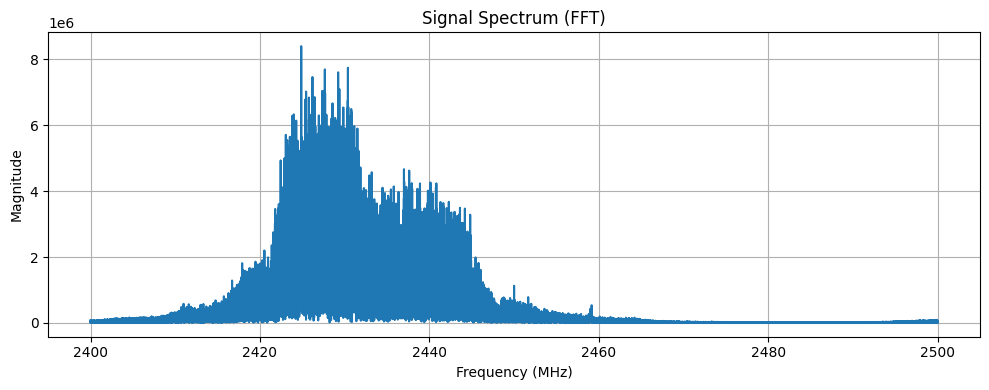

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(absolute_freqs / 1e6, fft_magnitude_shifted)
plt.title("Signal Spectrum (FFT)")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
len(waveform)

100000